## GRIP:The Sparks Foundation

### Data Science and Business Analytics Intern

### Task 3 Exploratory Data Analysis (EDA)- Retail

### by: Deepank Tyagi

# 1. Importing Libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
from plotnine import ggplot,ggtitle, aes, geom_line,geom_bar, geom_col,coord_flip,scale_fill_brewer,theme_classic,theme,element_text,facet_wrap
warnings.filterwarnings('ignore')


# 2. Importing the Dataset

In [50]:
df = pd.read_csv('SampleSuperstore.csv')

In [51]:
df.head()             # displays first five rows of the data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [52]:
df.tail(5)        # displays last five rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# 3. Data Exploration

In [53]:
df.info()                                # gives information related to the data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [54]:
df.describe()                                  # gives statistical information about the dataset

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 4. Data Preprocessing

In [55]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [56]:
## Checking of Duplicated data
df.duplicated().sum()

17

In [57]:
## Deleting Duplicates if any
df.drop_duplicates(inplace=True)

In [58]:
## founding out any duplicates left from the sample file
df.duplicated().sum()


0

In [59]:
## Displaying the unique data
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [60]:
##Dropping of Irrelevant columns like we have postal code in the sample file
col =['Postal Code']
drop =df.drop(columns=col, axis=1, inplace =True)



In [61]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# 5. Data Visualisation

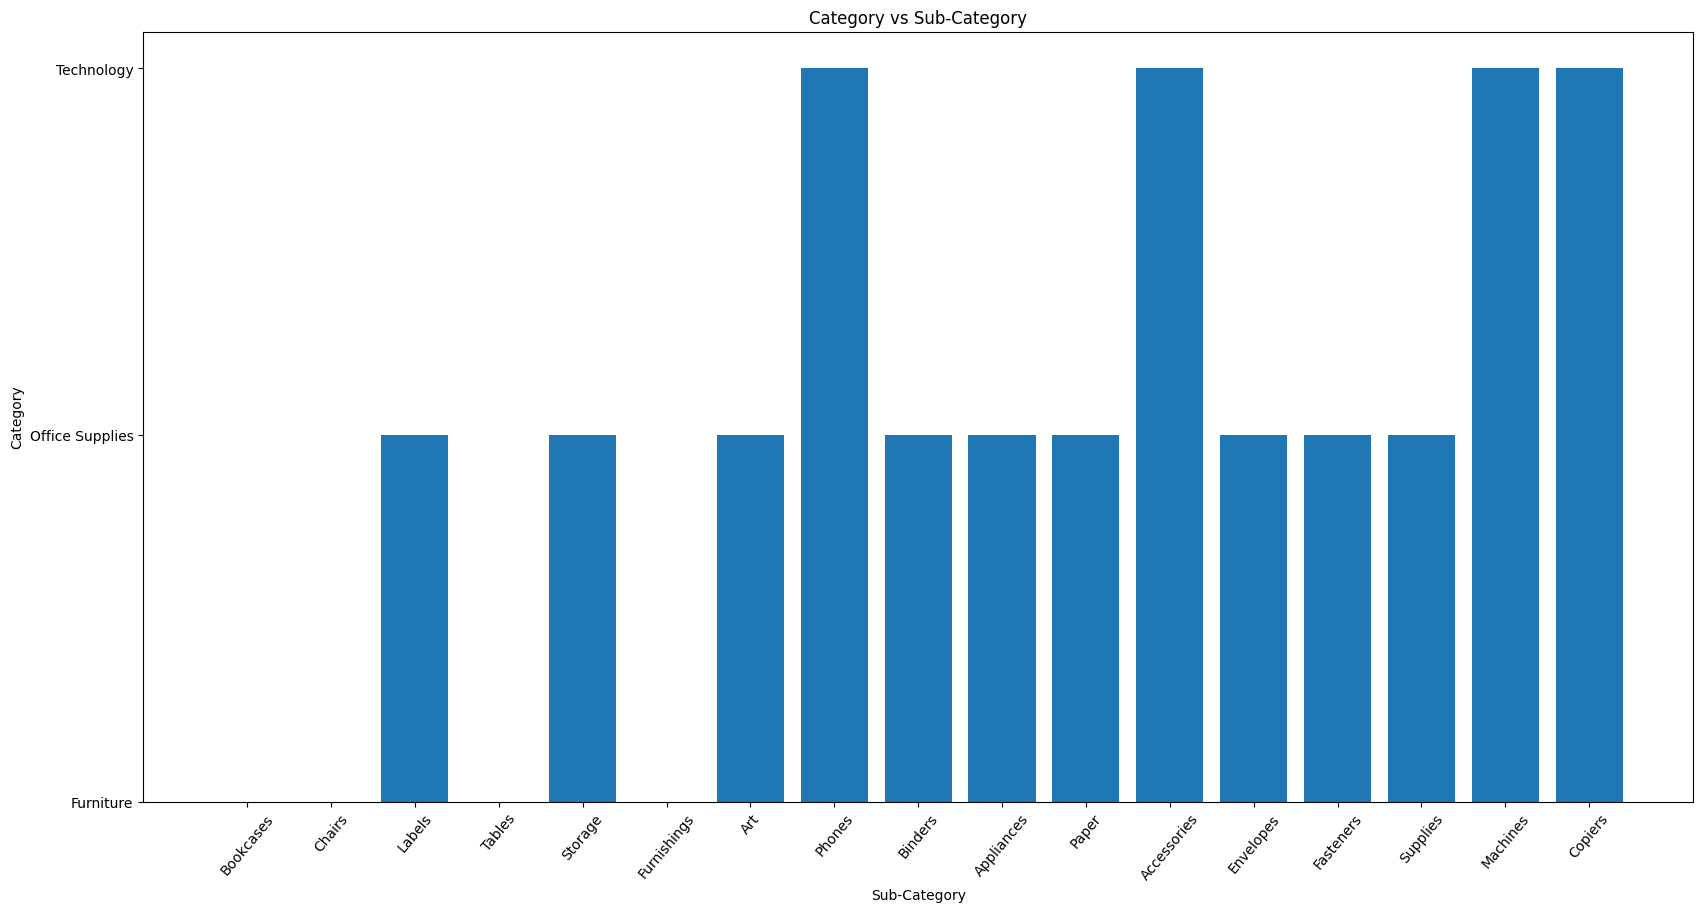

In [62]:
plt.figure(figsize=(20,10))
plt.bar('Sub-Category','Category', data=df)
plt.title('Category vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=50)
plt.show()


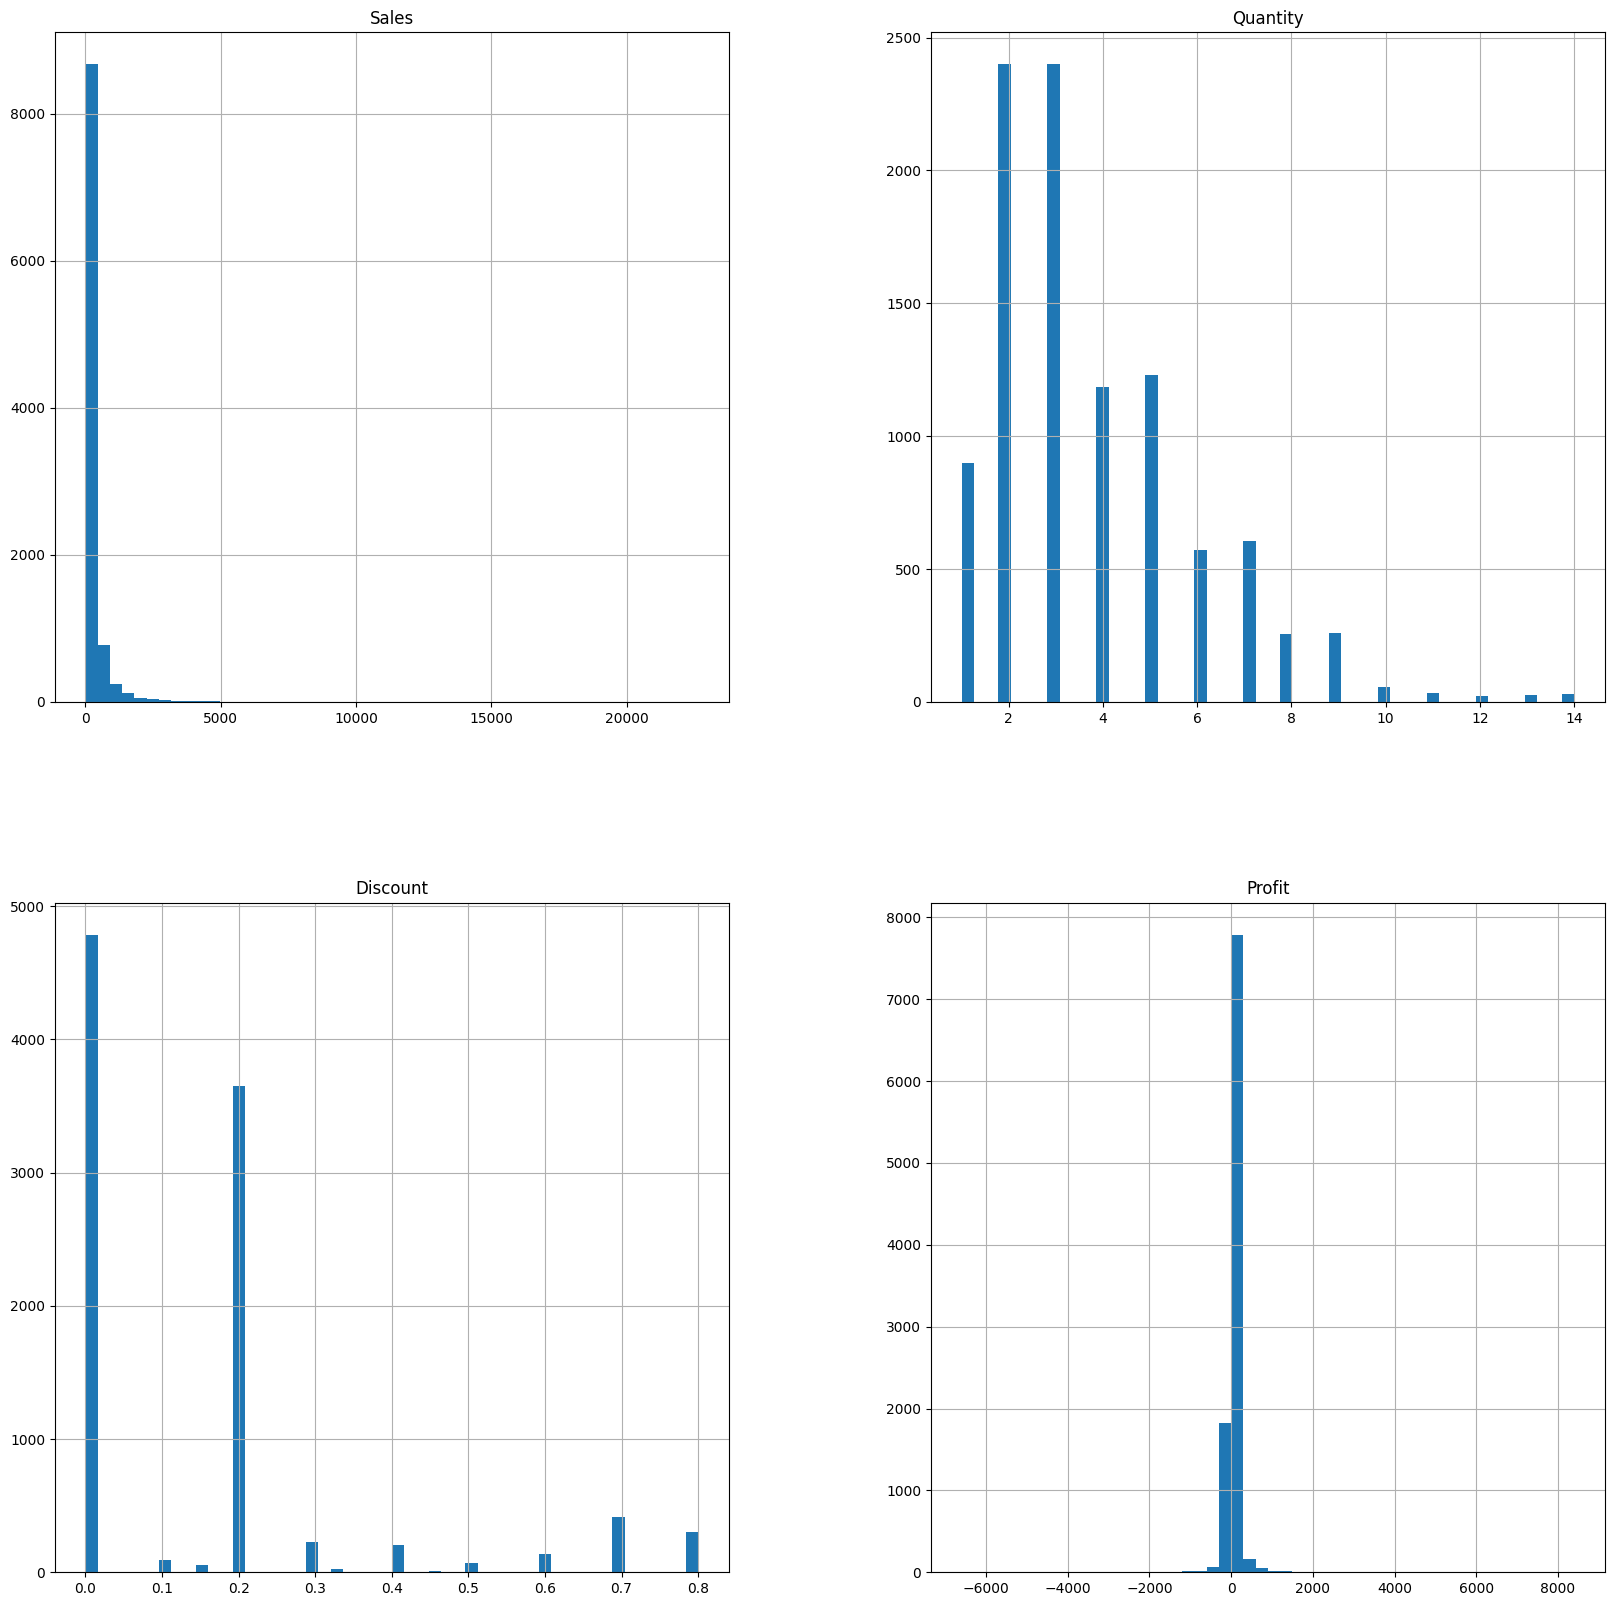

In [63]:
df.hist(bins=50,figsize=(20,20))
plt.show()

In [64]:
## Counting repeatable states
df['State'].value_counts()

State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

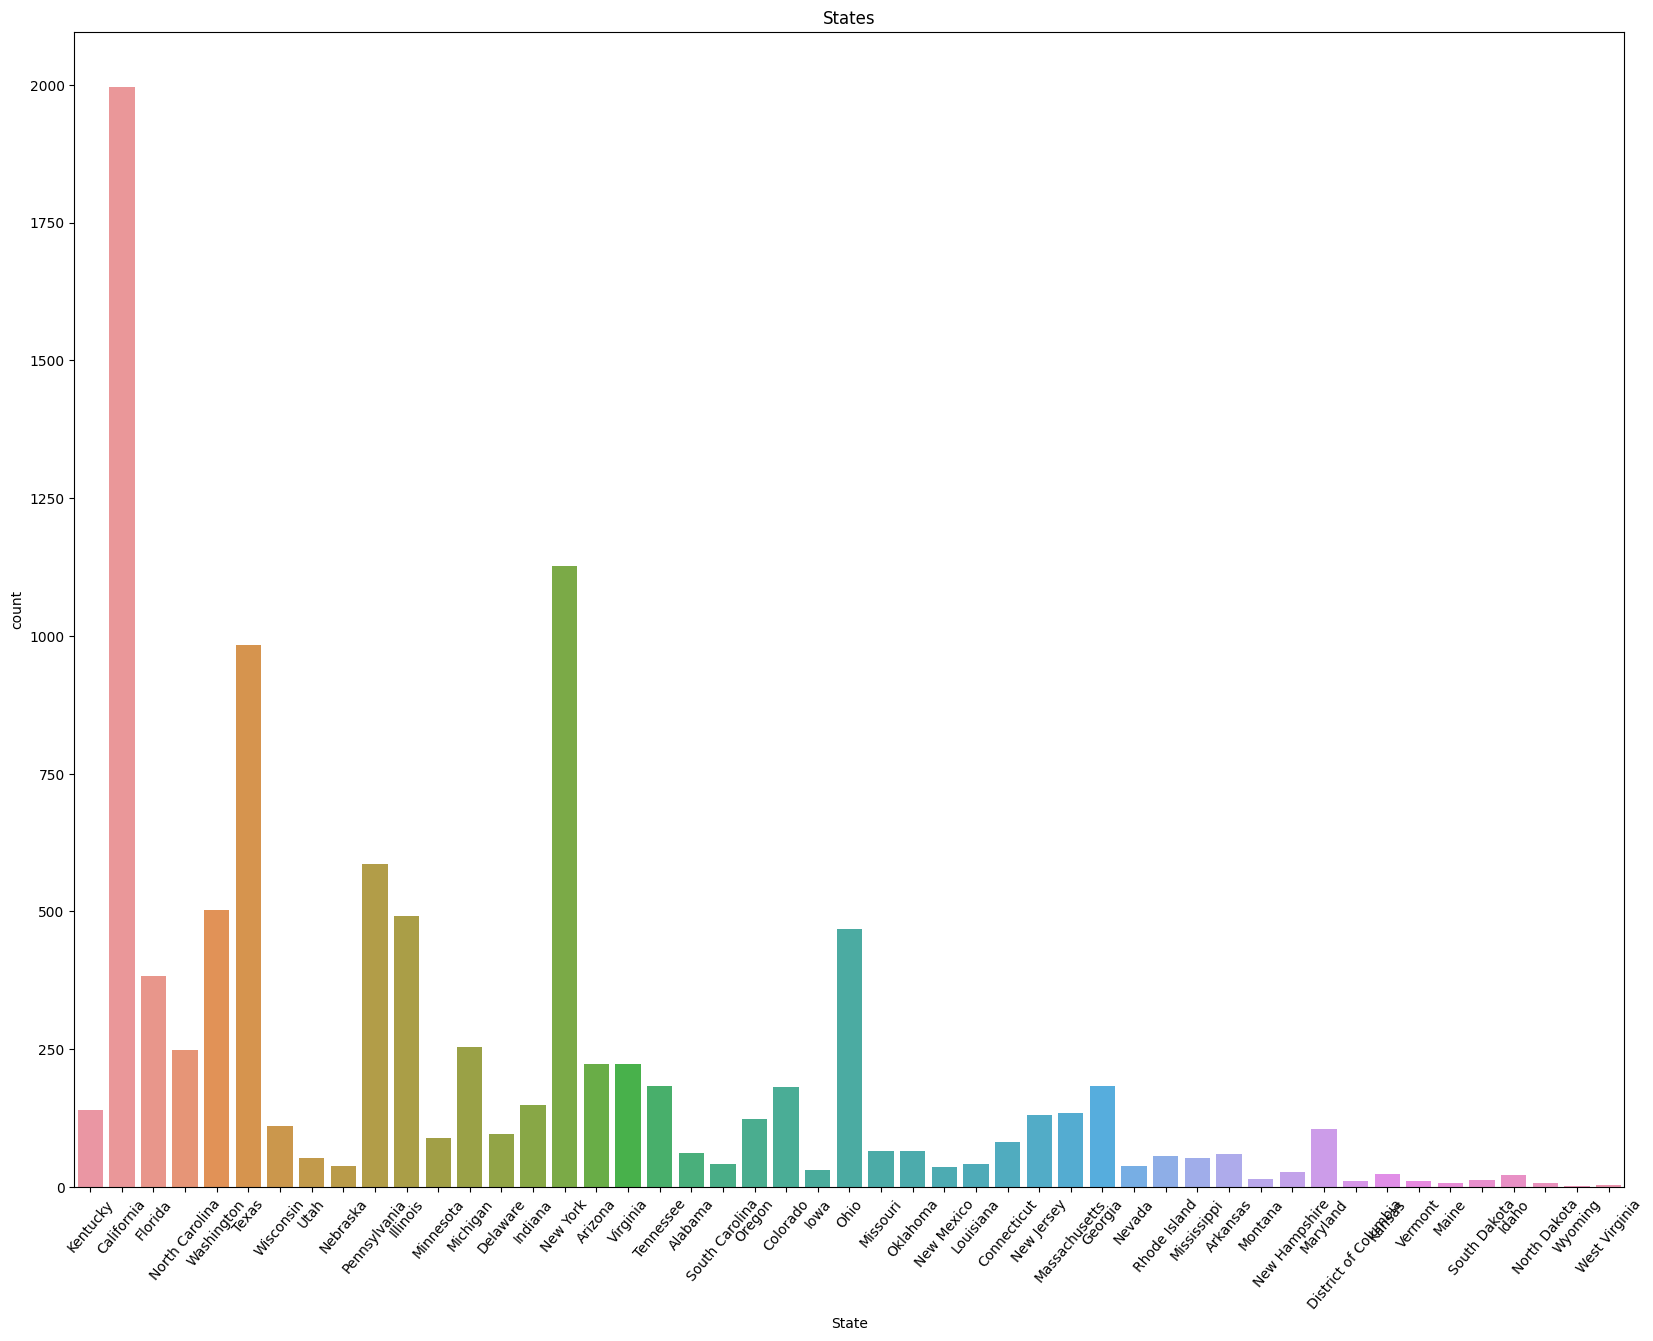

In [65]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['State'])         # countplot for states 
plt.xticks(rotation=50)
plt.title('States')
plt.show()

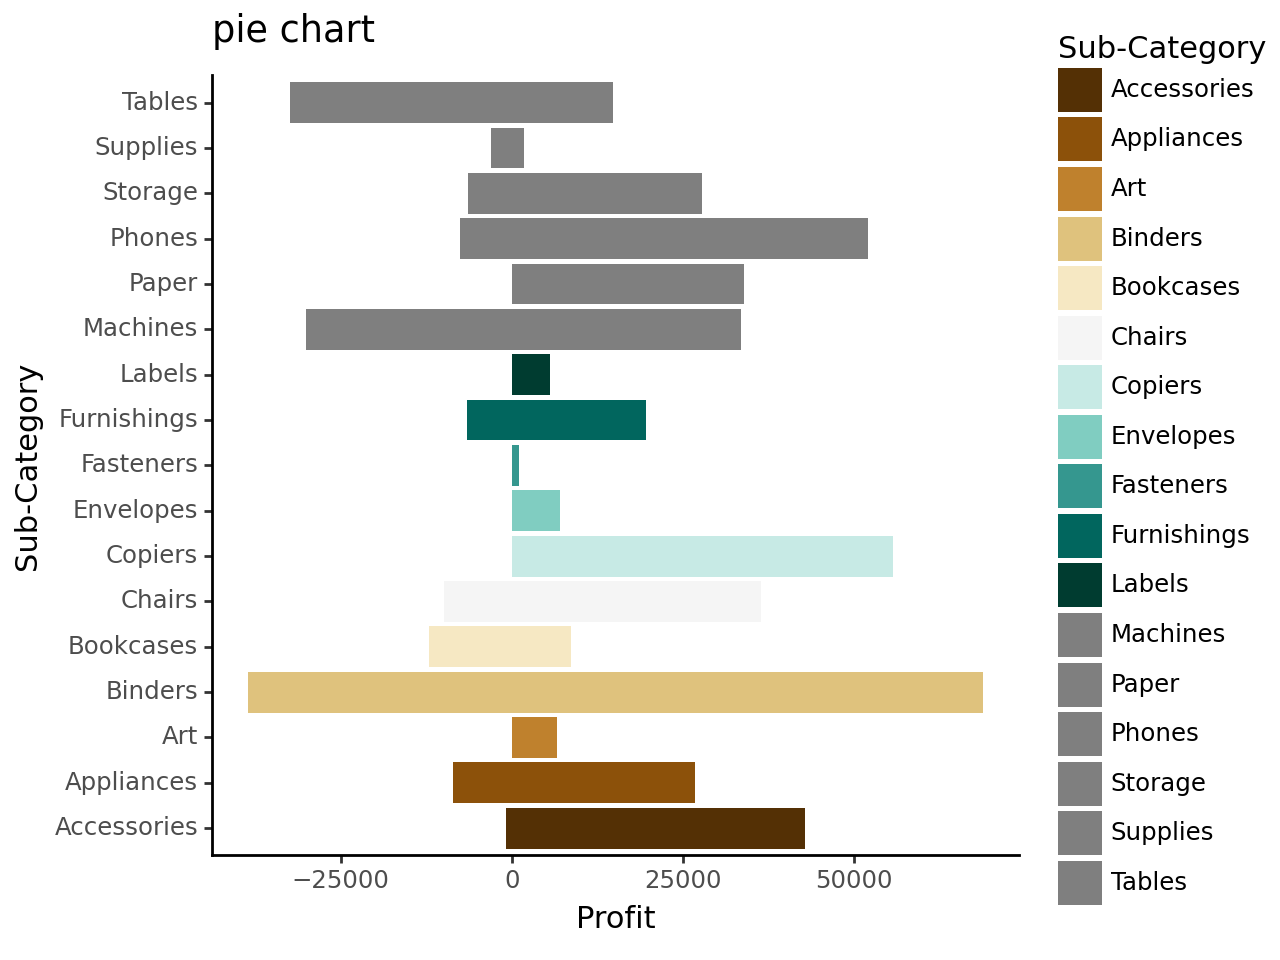

<Figure Size: (640 x 480)>

In [81]:
Profit_plot=(ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', pelette='Spectral') + theme_classic() + ggtitle('pie chart'))
display(Profit_plot)

# 6. checking out the categories and shipping modes

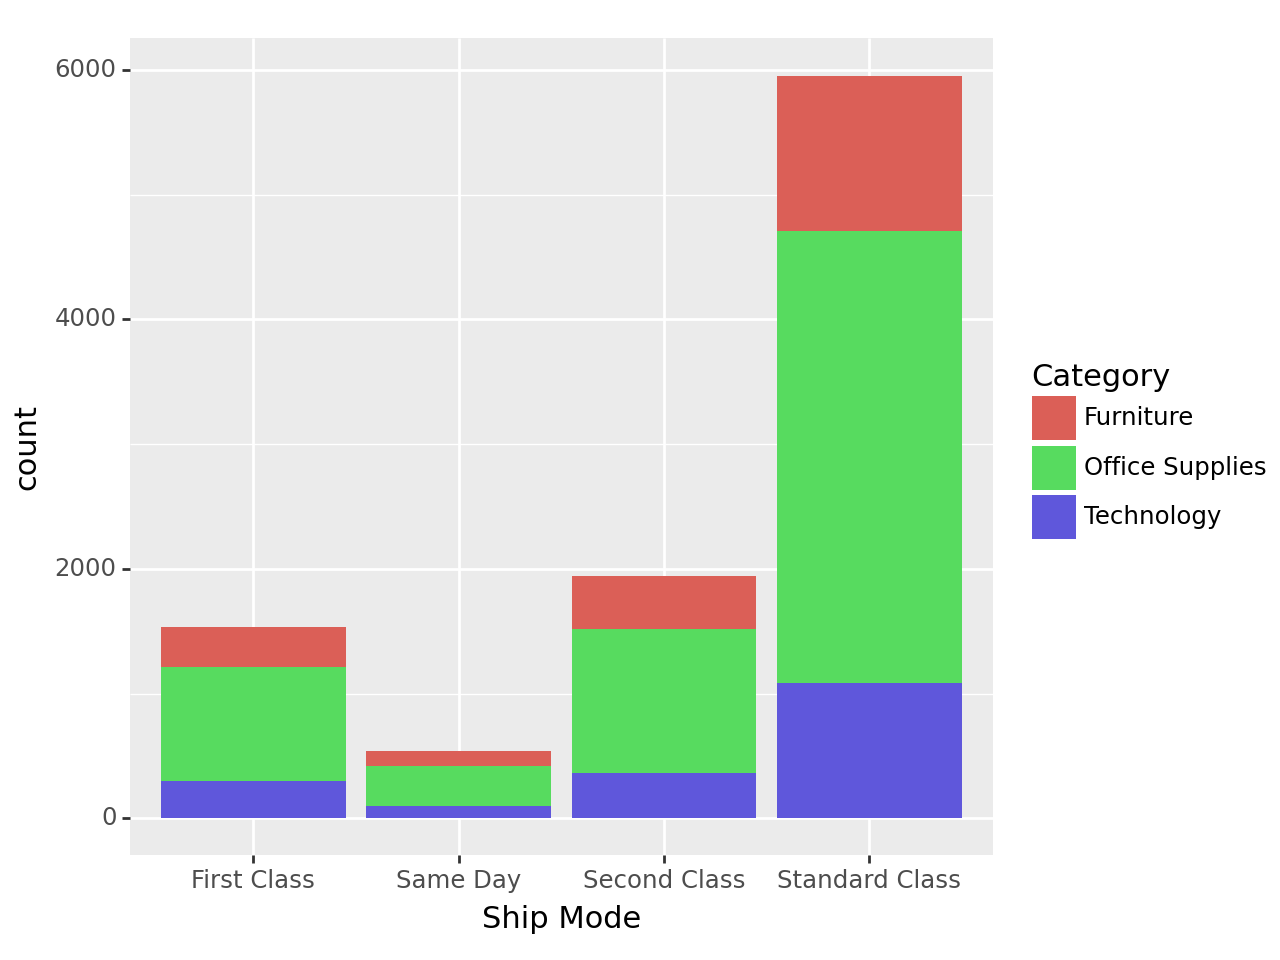

<Figure Size: (640 x 480)>

In [84]:
ggplot(df, aes(x='Ship Mode', fill ='Category')) + geom_bar(stat ='count')

In [89]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                    axis_ticks_length_major=10,axis_ticks_length_minor=5)


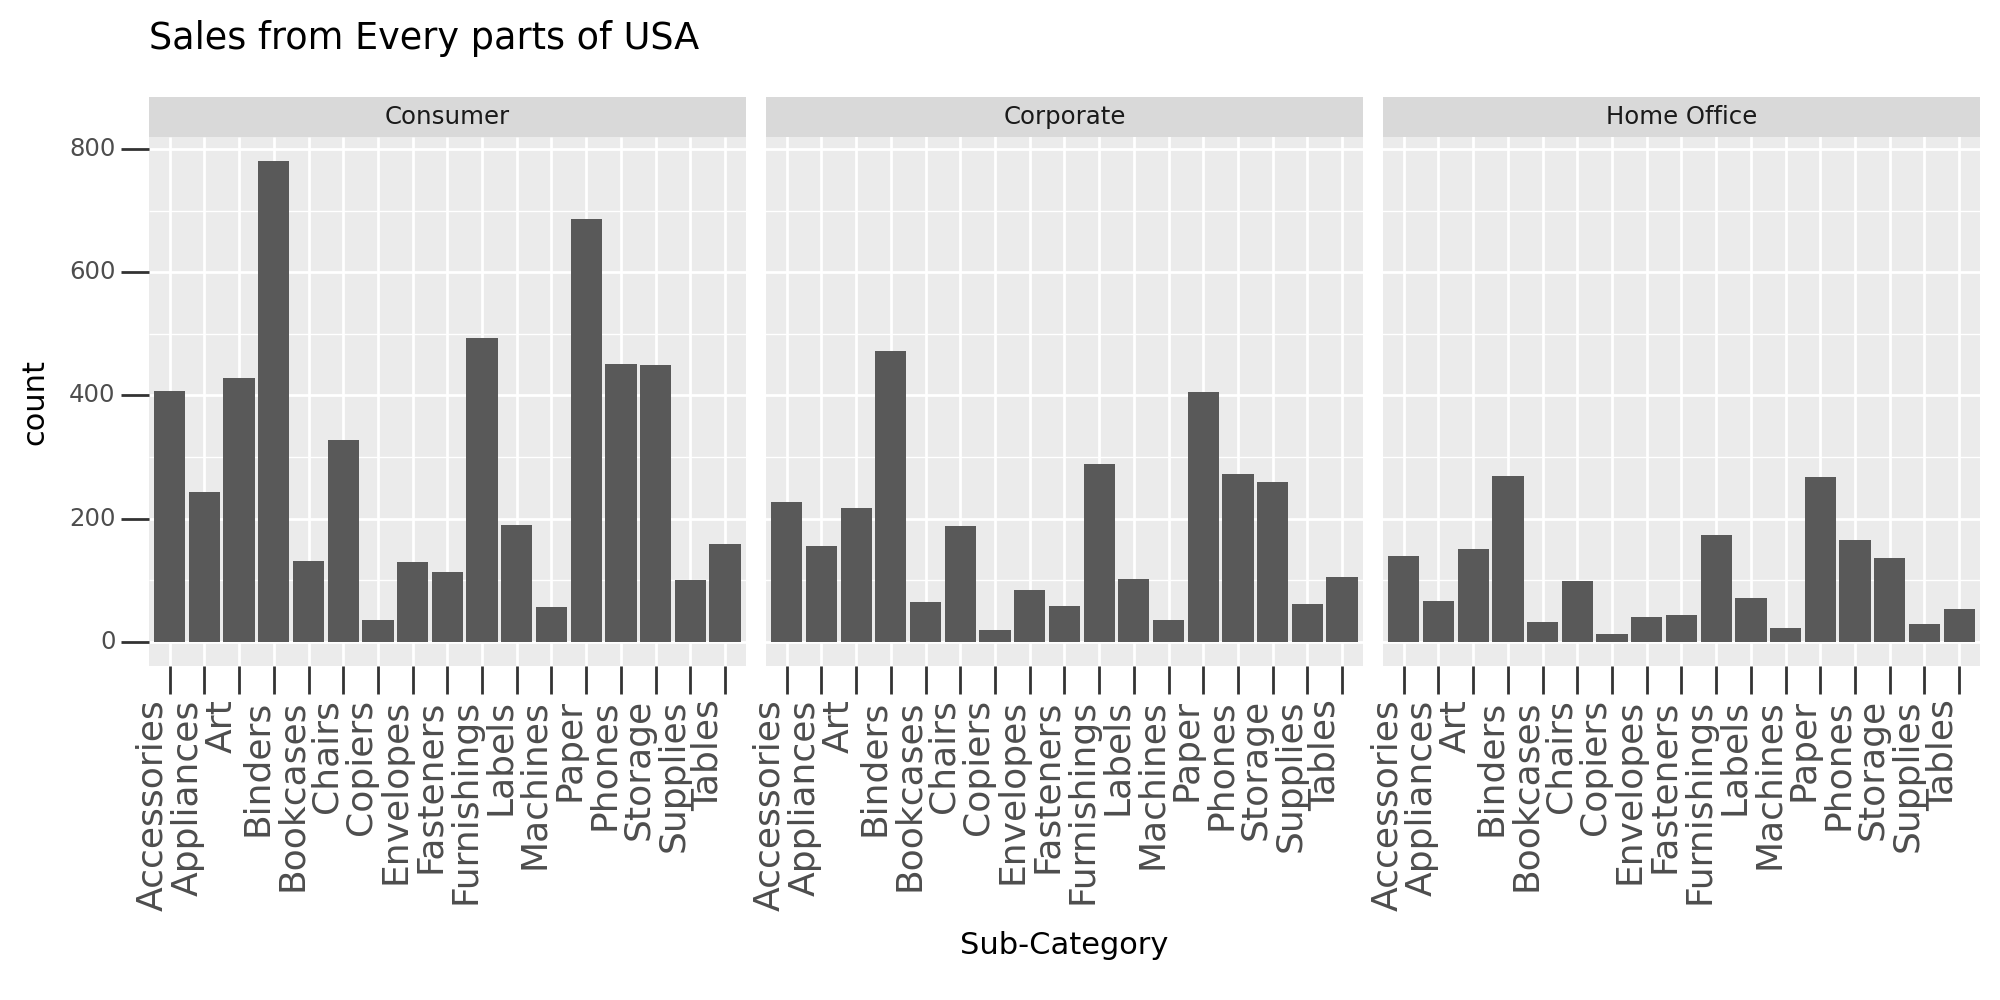

<Figure Size: (1000 x 500)>

In [92]:
(ggplot(df, aes(x='Sub-Category', fill='Sales'))+ geom_bar()+ facet_wrap(['Segment'])+flip_xlabels + theme(axis_text_x = element_text(size=13))+ggtitle("Sales from Every parts of USA"))


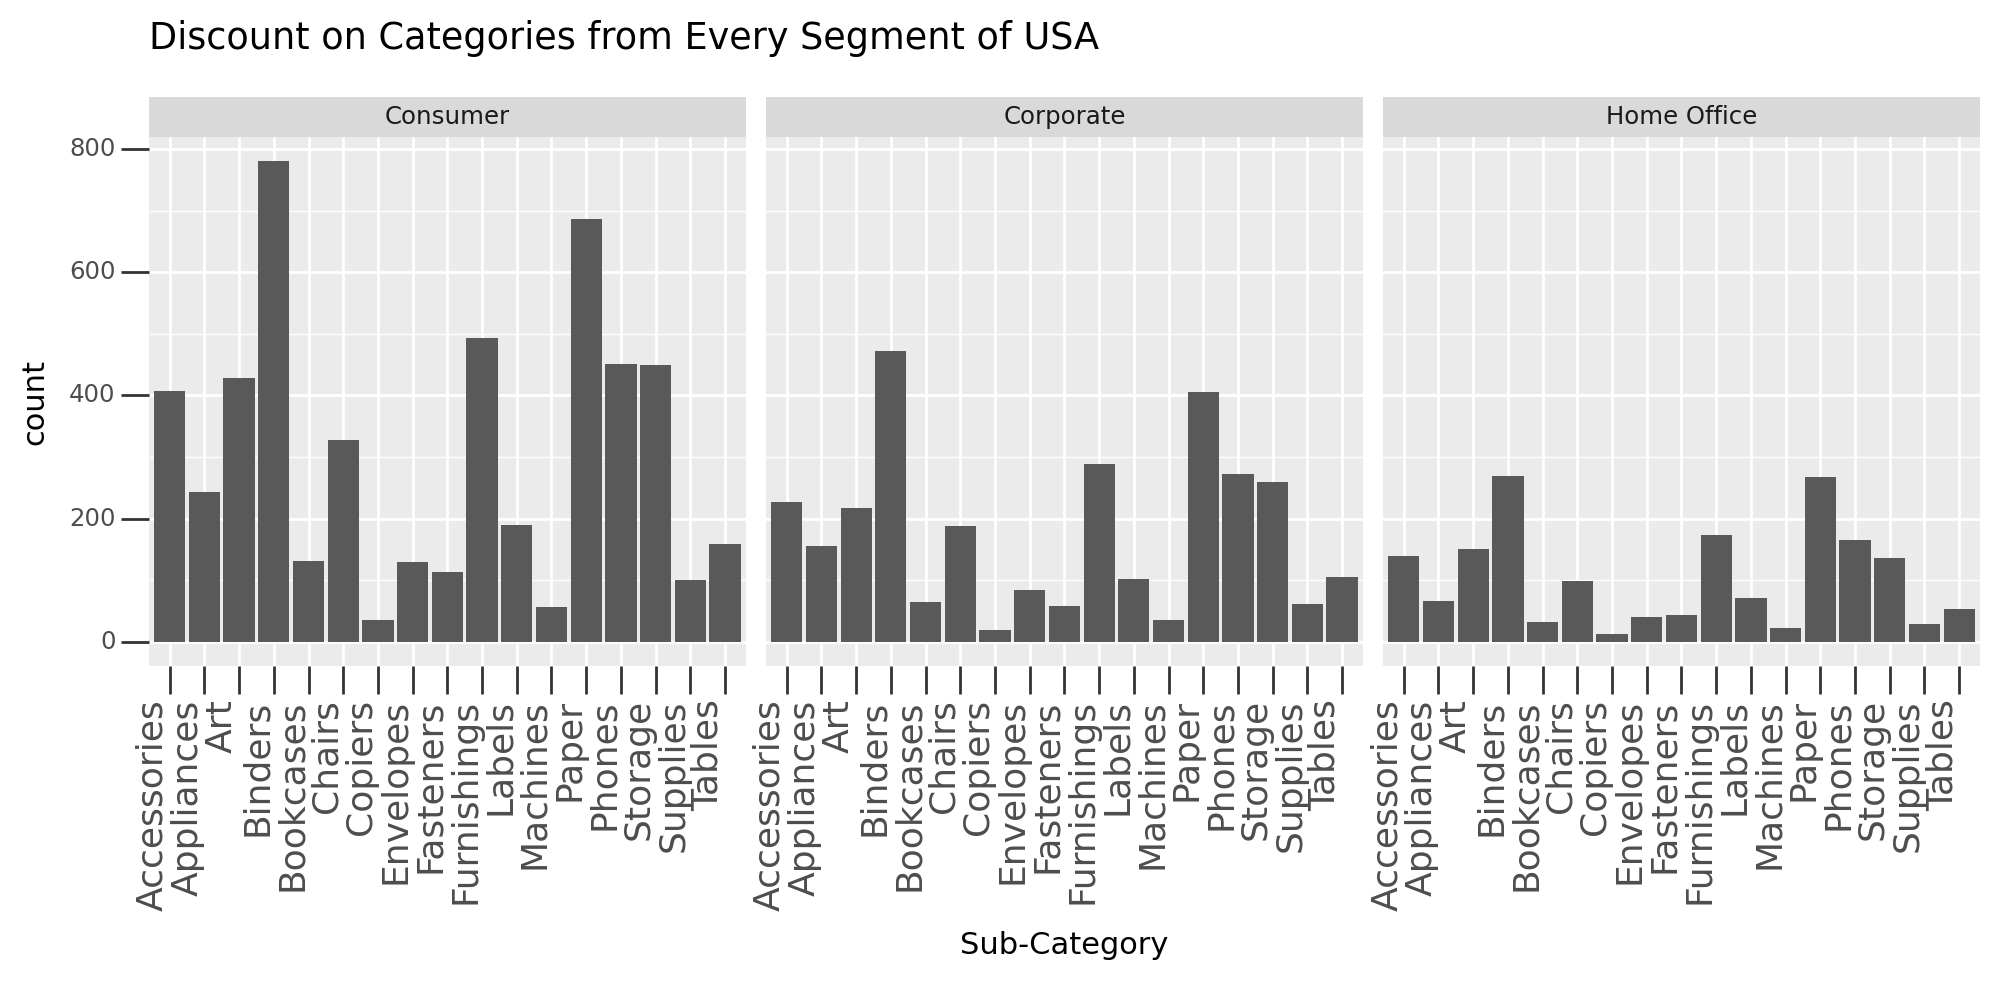

<Figure Size: (1000 x 500)>

In [93]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                    axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Discount'))+ geom_bar()+ facet_wrap(['Segment'])+flip_xlabels + theme(axis_text_x = element_text(size=13))+ggtitle("Discount on Categories from Every Segment of USA"))




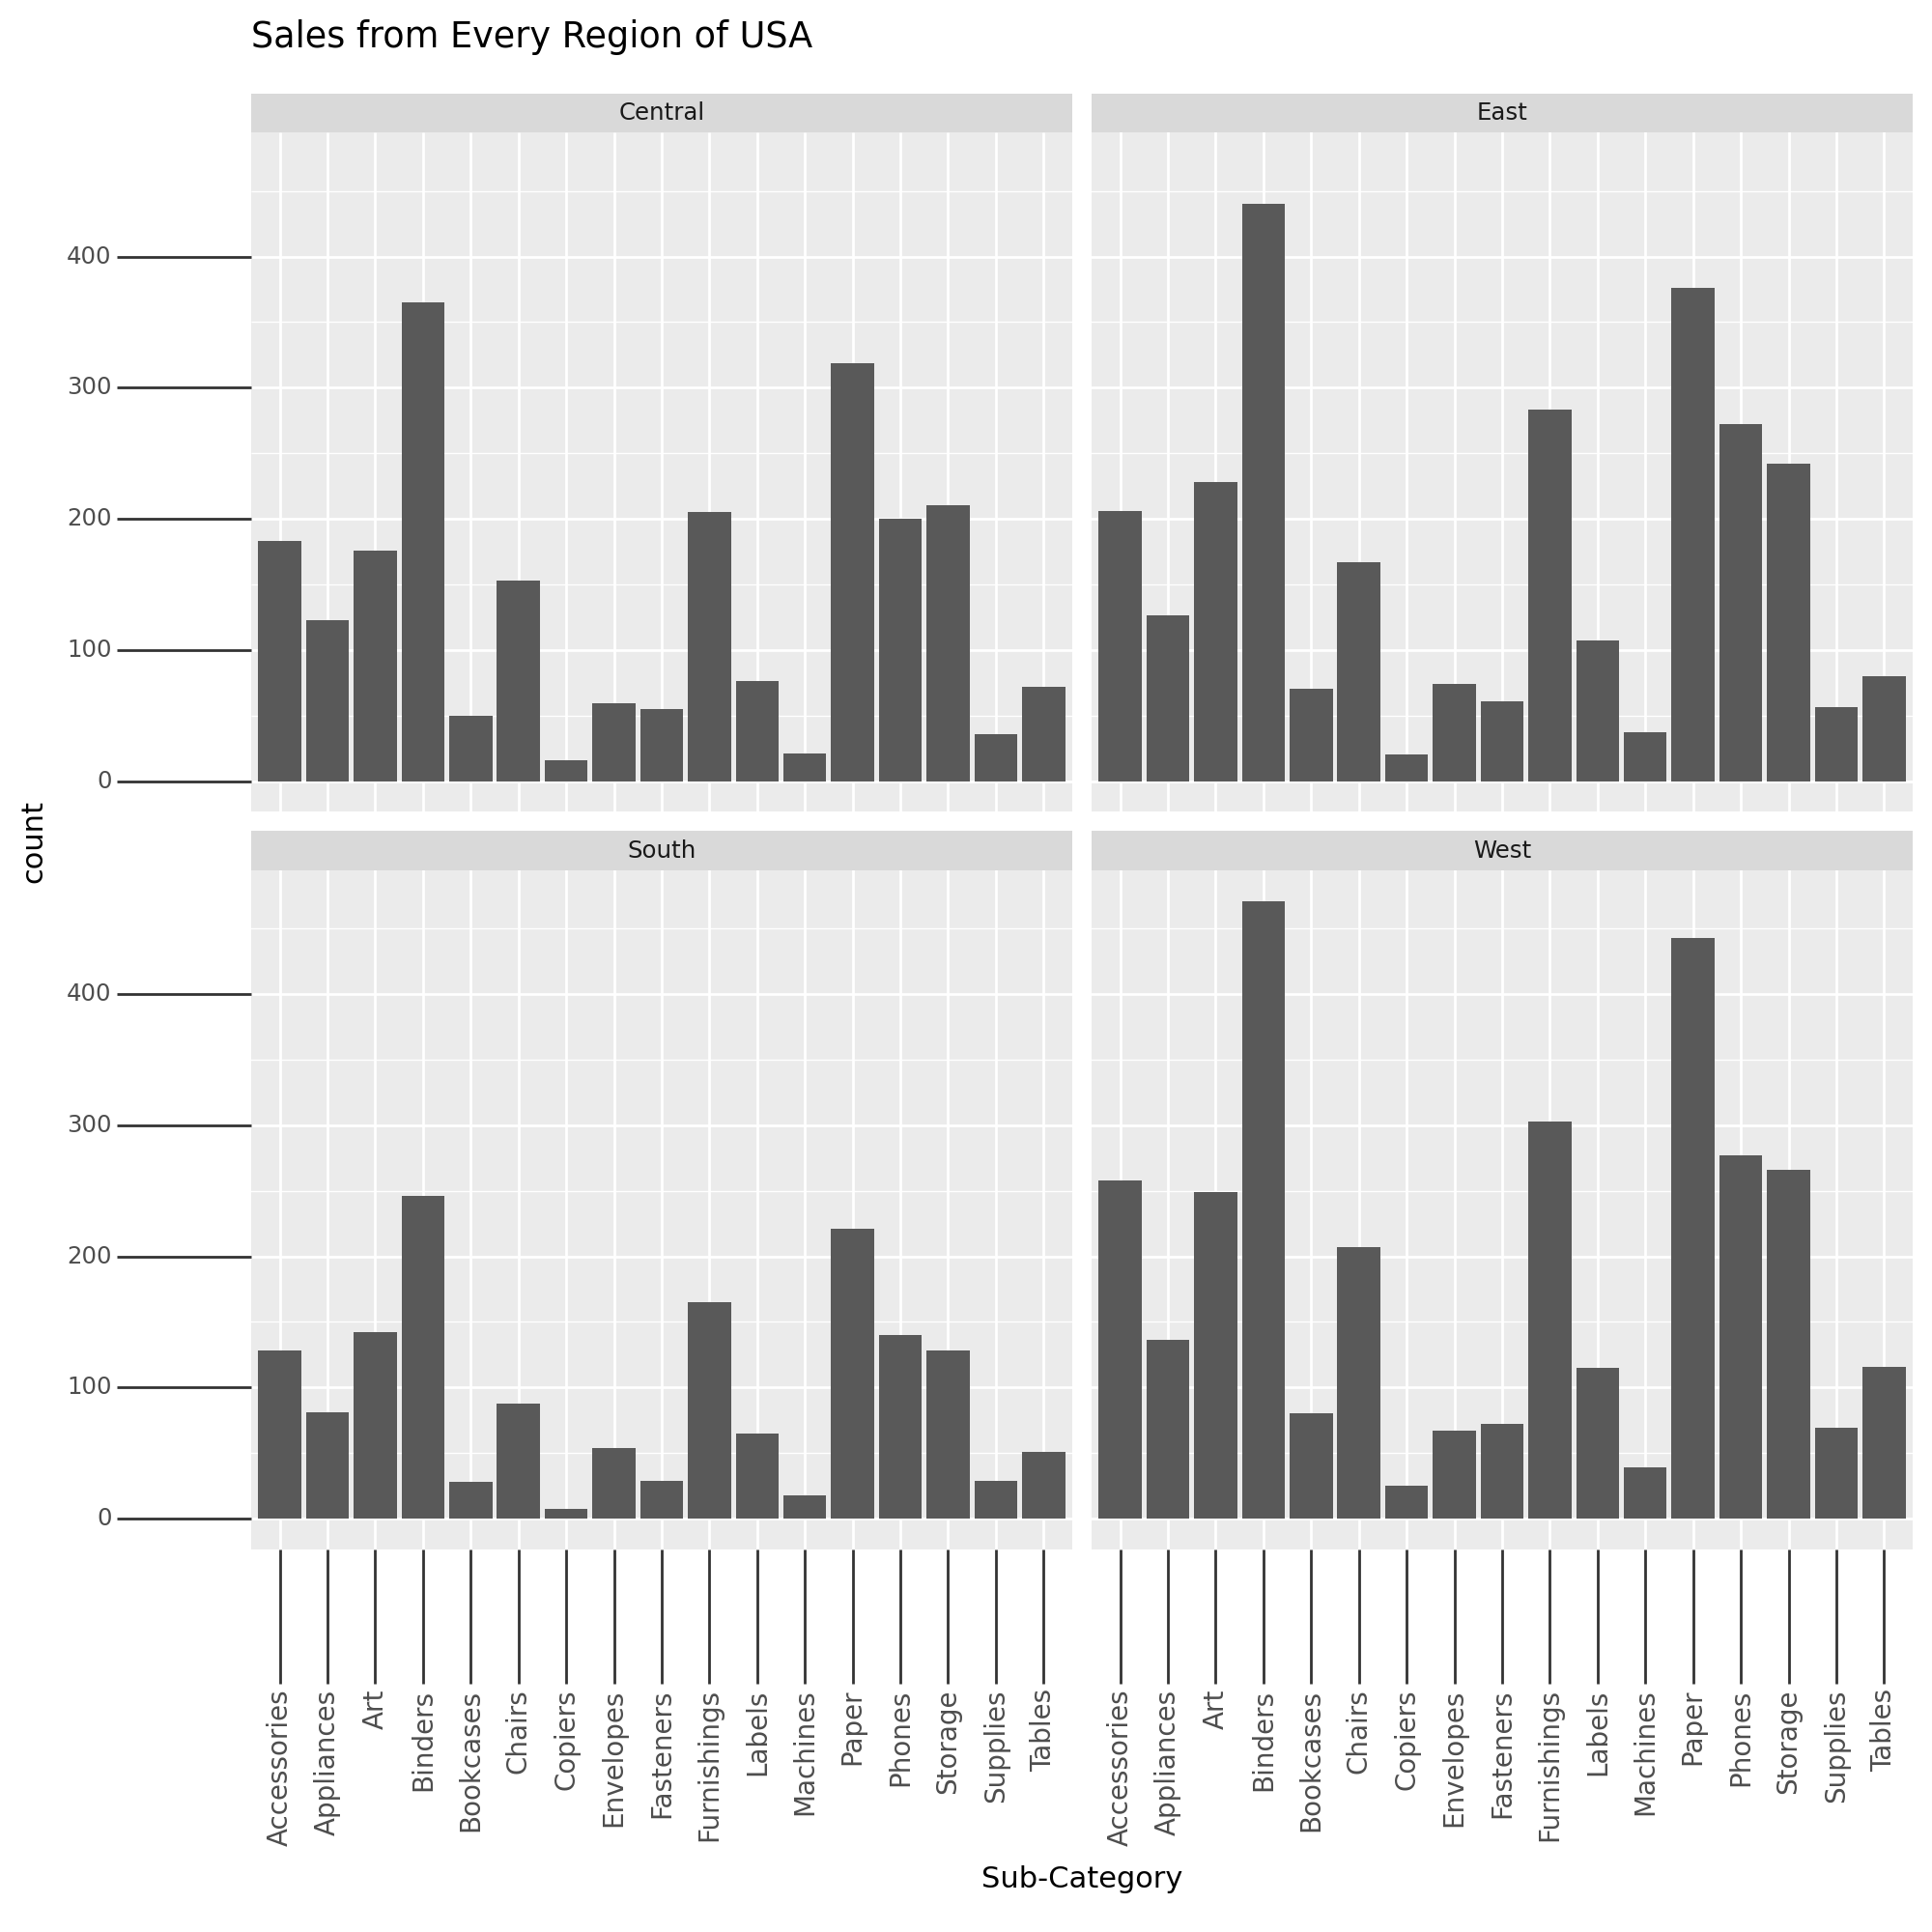

<Figure Size: (1000 x 1000)>

In [94]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                    axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(df, aes(x='Sub-Category', fill='Sales'))+ geom_bar()+ facet_wrap(['Region'])+flip_xlabels + theme(axis_text_x = element_text(size=10))+ggtitle("Sales from Every Region of USA"))




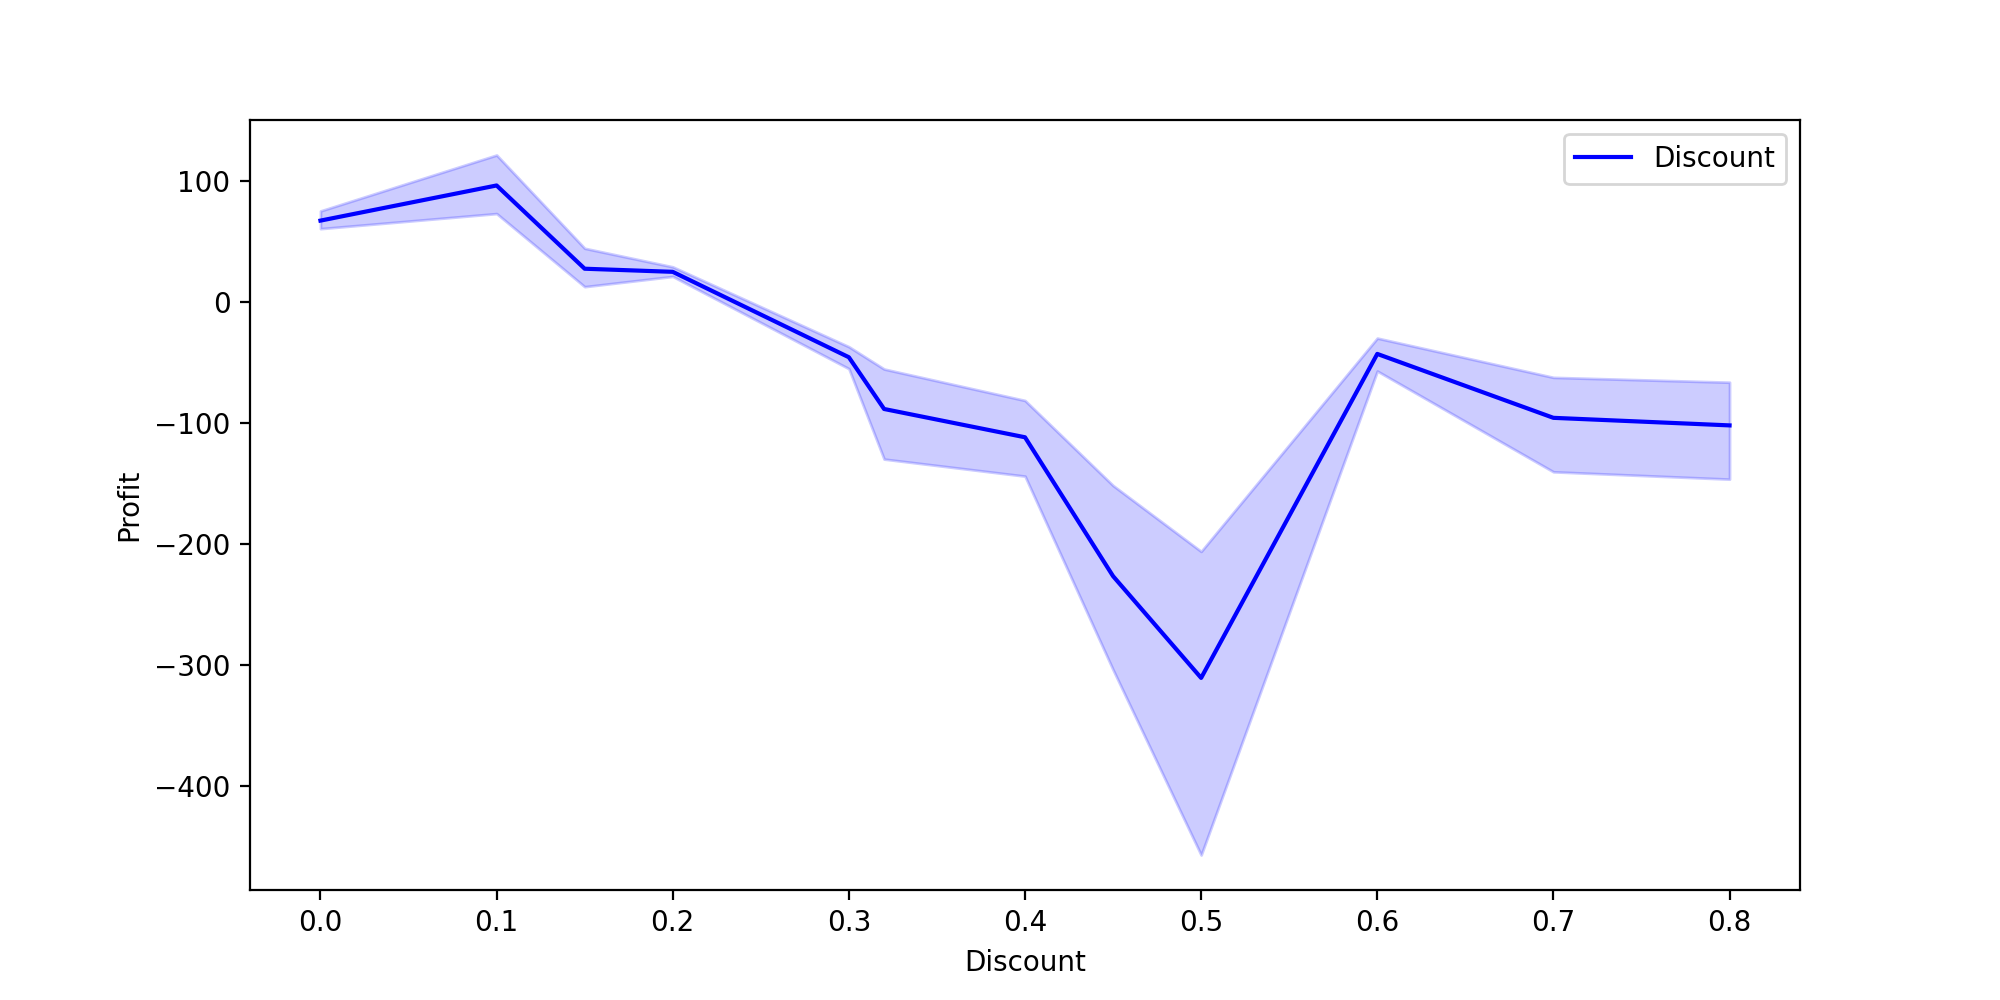

In [96]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Discount",y= "Profit", data=df, color='b',label='Discount')
plt.legend()
plt.show()

In [98]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [101]:
state_code ={
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df['state_code'] =df.State.apply(lambda x: state_code[x])

In [108]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()

##### Now lets Analysis the sales of few states in terms of high profit, medium, loss

In [110]:
def state_data_viewer(states):
    """plots the turnover generated by different product categories and sub-categories for the list of given states
    Args:
       states -List all the states you want to plot for
       Returns:
       None
       """
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (30,4))
        fig.suptitle(state, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1

        fig.show()


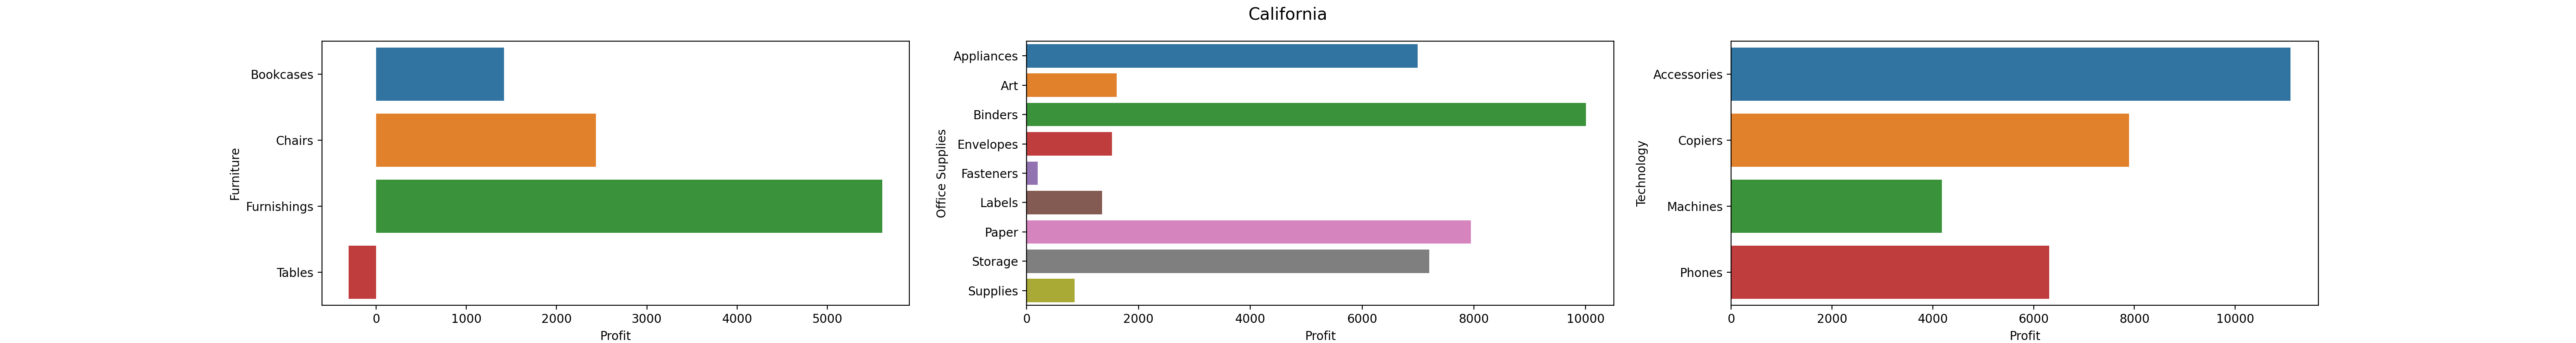

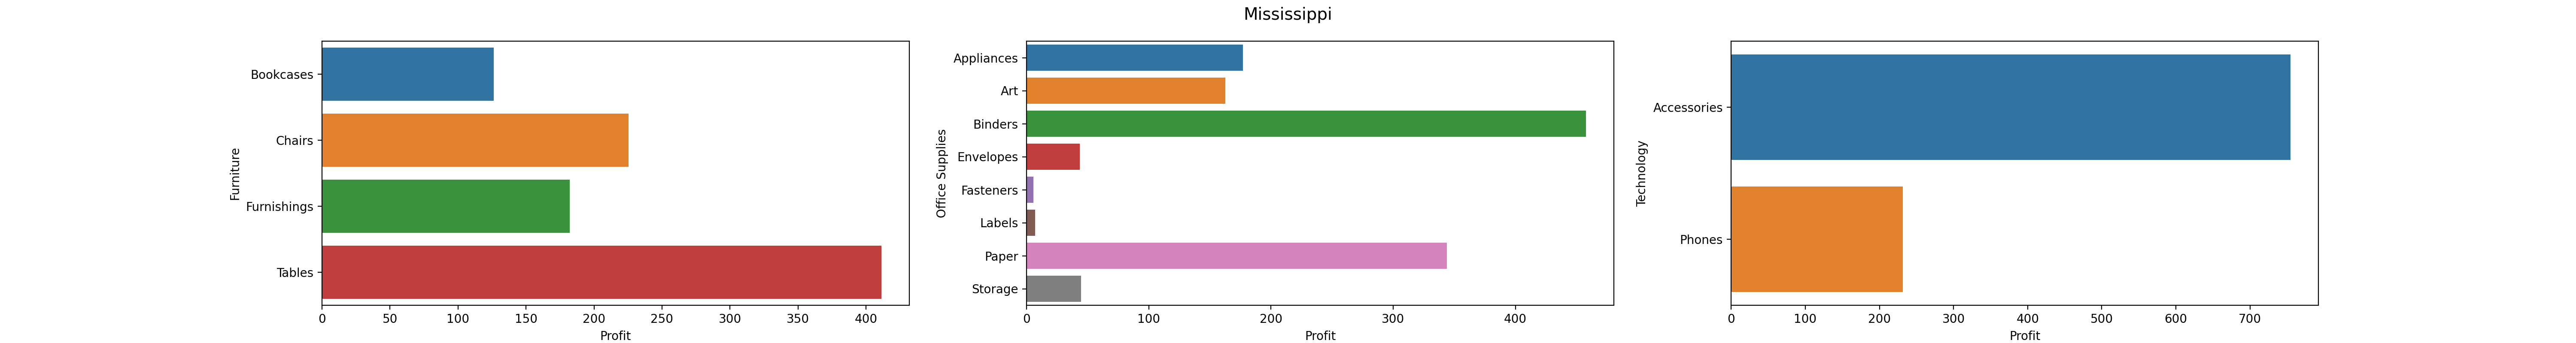

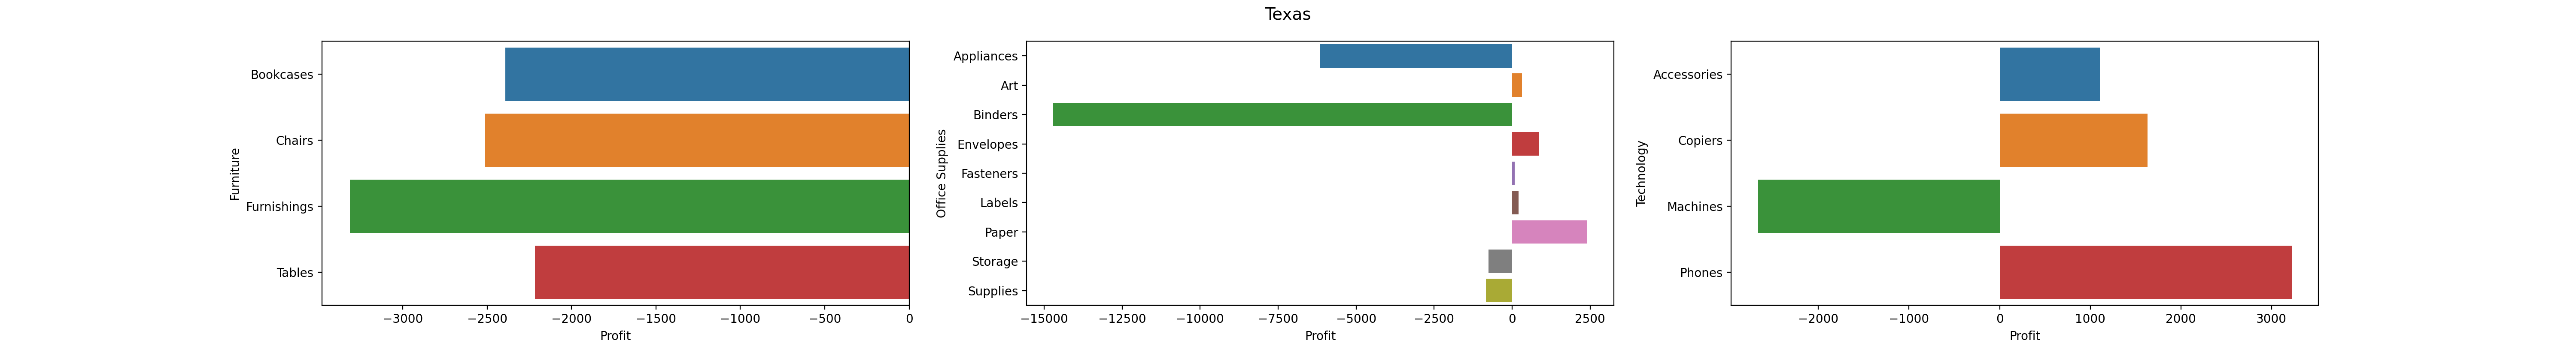

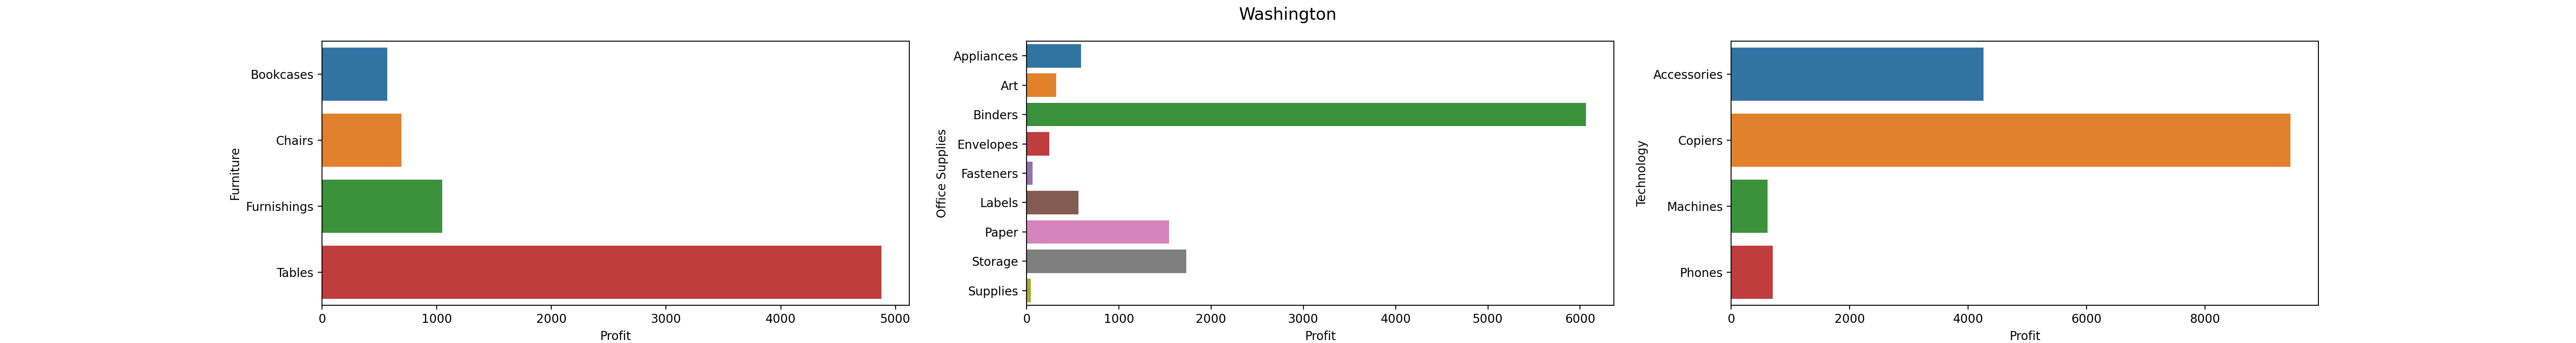

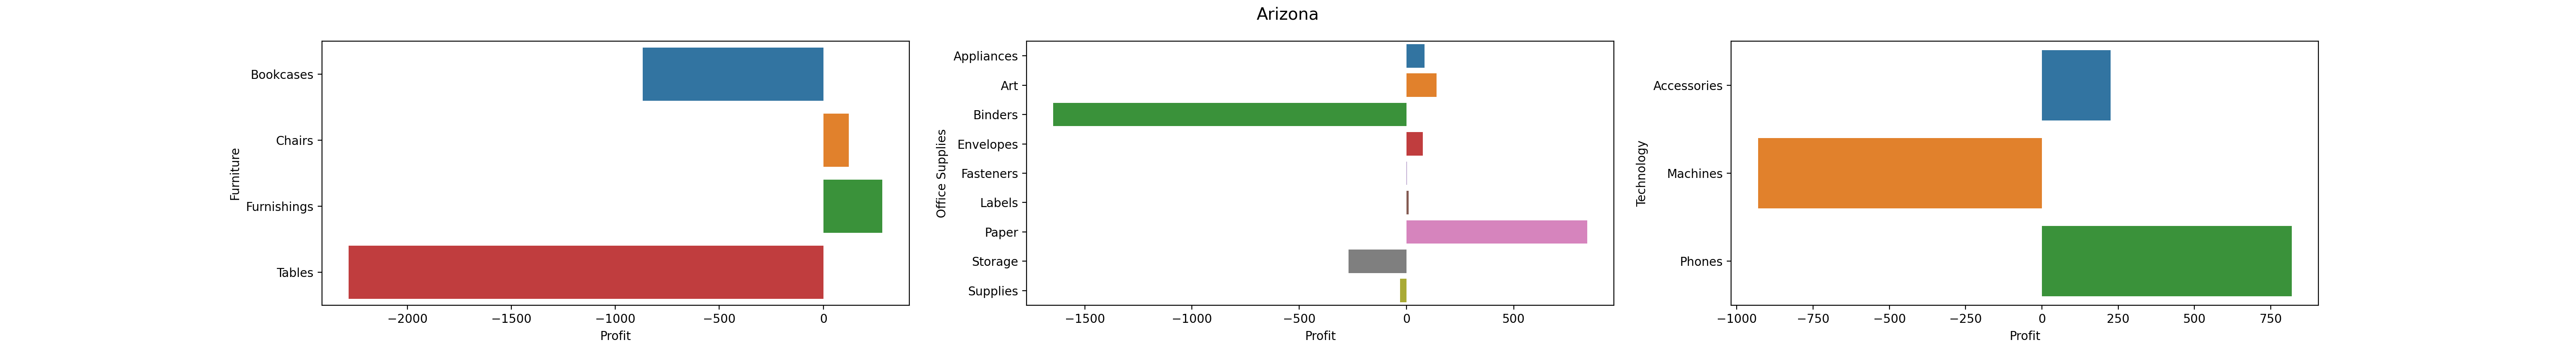

In [107]:
states =['California', 'Mississippi', 'Texas','Washington','Arizona']
state_data_viewer(states)